
# 📖 Summary: Classification (from ISLP)

This lecture is based on Chapter 4 of *An Introduction to Statistical Learning with Applications in Python* (ISLP). In this chapter, the authors introduce **classification**, a key supervised learning problem where the goal is to predict a qualitative (categorical) response.

## Topics covered
- **Why not use linear regression for classification?**
  Linear regression is not ideal for classification because it can produce probabilities outside [0, 1] and does not handle class boundaries well.

- **Logistic Regression (Section 4.3)**
  Logistic regression models the probability that a given observation belongs to a particular category. It uses the logistic (sigmoid) function to constrain predicted probabilities between 0 and 1.

- **Discriminant Analysis (Section 4.4)**
  Includes Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA). These approaches model the distribution of predictors separately for each class and use Bayes' theorem to estimate class probabilities.

- **K-Nearest Neighbors (KNN) (Section 4.7)**
  A non-parametric method that classifies a new observation based on a majority vote among its nearest neighbors in the training data.

- **Comparison of methods (Section 4.5)**
  The choice of method depends on data assumptions, interpretability, and performance.

## Key Concepts
- **Decision boundaries**: Lines or surfaces that separate different classes.
- **Bayes classifier**: The theoretical optimal classifier with the lowest possible error rate.
- **Training vs. test error**: Important for evaluating the generalization performance of a classifier.

**Reference:** ISLP, Chapter 4 — Classification


# DATA 607 - Machine Learning

## Class 4 &mdash; 2025.07.09

### Imbalanced classification. Text data.

In [51]:
! pip install -U ipywidgets

### ℹ️ Logistic Regression (ISLP Section 4.3)
Logistic regression models the log-odds of the probability of an event. It is widely used for binary classification and naturally constrains outputs between 0 and 1.

### 🛠️ LogisticRegression
`LogisticRegression()` from `sklearn.linear_model` fits a logistic regression model. Key parameters:
- `penalty`: Type of regularization ('l2' by default).
- `C`: Inverse of regularization strength. Smaller values specify stronger regularization.
- `solver`: Algorithm to use (e.g., 'lbfgs').

### 🛠️ train_test_split
`train_test_split()` from `sklearn.model_selection` splits data arrays into random train and test subsets. Parameters:
- `test_size`: Proportion of the dataset for the test split.
- `random_state`: Controls shuffling for reproducibility.

### What is `GridSearchCV` and what is it used for?

`GridSearchCV` is a function in scikit-learn that helps you **automatically find the best hyperparameters** for a model by exhaustively searching over a specified parameter grid.

---

#### Why use `GridSearchCV`?

✅ **Hyperparameter tuning made easy**
Rather than manually trying different parameter values and checking scores, `GridSearchCV` systematically evaluates all combinations for you.

✅ **Cross-validation built in**
It uses cross-validation (CV) to assess each set of hyperparameters. This means it splits your training data into multiple folds, trains on subsets, and validates on the remaining parts to get a more reliable estimate of model performance.

---

#### How does it work?

1️⃣ You define a **parameter grid**, for example:

```python
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10]}
```

2️⃣ You pass your model (or pipeline) and this grid to GridSearchCV:
```python
search = GridSearchCV(model, param_grid, scoring="accuracy")
```

3️⃣ When you call `.fit(X, y)`, it:
* Trains and evaluates the model for each parameter combination using cross-validation.
* Selects the set of parameters that gives the best score (e.g., highest accuracy or F1 score).

4️⃣ You can access:
* `search.best_params_`: The hyperparameter values that performed best.
* `search.best_score_`: The best average cross-validated score achieved during search.
* `search.best_estimator_`: The full model (or pipeline) configured with the best hyperparameters.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

#### One more word on overfitting

Training error being significantly smaller than testing error doesn't necessarily mean there's a problem.

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

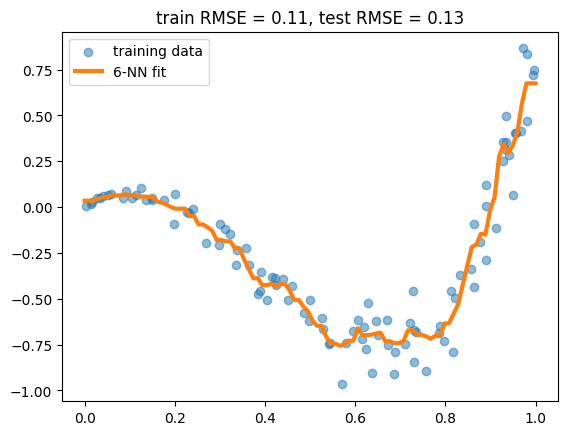

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Function to generate synthetic data
def make_data(n=100, rng=None):
    rng = np.random.default_rng(rng)  # Create a random number generator
    x = rng.uniform(size=n)  # Generate n values uniformly in [0, 1)
    # Create non-linear target variable y with some noise
    y = 10 * x * (x - 0.2) * (x - 0.9) + 10 * x * 0.02 * rng.normal(size=n)
    return x, y

# Initialize random number generator for reproducibility
rng = np.random.default_rng(0)

# Generate training data (100 points)
x_train, y_train = make_data(100, rng=rng)
X_train = x_train.reshape(-1, 1)  # Reshape to 2D array for sklearn

# Generate test data (10,000 points for better evaluation)
x_test, y_test = make_data(10000, rng=rng)
X_test = x_test.reshape(-1, 1)

# Create a k-nearest neighbors regressor with 6 neighbors
model = KNeighborsRegressor(n_neighbors=6)

# Fit the model to the training data
model.fit(X_train, y_train)

# Calculate root mean squared error on training set
train_mse = np.mean(root_mean_squared_error(y_train, model.predict(X_train)))

# Calculate root mean squared error on test set
test_mse = np.mean(root_mean_squared_error(y_test, model.predict(X_test)))

# Create a grid of x values for plotting model predictions
grid = np.linspace(0, 1, 100)

# Plot the training data
plt.scatter(x_train, y_train, alpha=0.5, label="training data")

# Plot the predicted curve from the KNN model
plt.plot(grid, model.predict(grid.reshape(-1, 1)), "C1", lw=3, label="6-NN fit")

# Add legend and title with RMSE scores
plt.legend()
plt.title(f"train RMSE = {train_mse:.2f}, test RMSE = {test_mse:.2f}")

# Show plot
plt.show()


### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate a design matrix X with 10,000 samples and 20 features, each feature ~ N(0, 1)
X = np.random.normal(size=(10000, 20))

# True coefficients (beta) for the linear model, drawn from N(0, 1)
beta = np.random.normal(size=20)

# Generate noise term e ~ N(0, 1) for each sample
e = np.random.normal(size=10000)

# Generate response variable y using linear model: y = X @ beta + e
y = X @ beta + e

# Split first 5000 samples as training data
X_train = X[:5000]
y_train = y[:5000]

# Initialize linear regression model
model = LinearRegression()

# Fit model on training data
model.fit(X_train, y_train)

# Calculate mean squared error (MSE) on training data
print(f"{mean_squared_error(y_train, model.predict(X_train))=}")

# Remaining 5000 samples as test data
X_test = X[5000:]
y_test = y[5000:]

# Calculate mean squared error (MSE) on test data
print(f"{mean_squared_error(y_test, model.predict(X_test))=}")


mean_squared_error(y_train, model.predict(X_train))=0.9602089880256998
mean_squared_error(y_test, model.predict(X_test))=0.9587646304237758


#### Imbalanced classification

- When a binary classification dataset is highly imbalanced, say $\mathbb{P}[Y=0]\approx 1$, then the constant classifier $\hat{y}=0$ has accuracy $\approx 1$.

- In these situations, the **false negative rate (FNR)** is $\approx 1$, which is as bad as it can be. Here,
  $$
  \text{FNR} = \mathbb{P}[\hat{y}=0\mid y=1].
  $$

- In typical applications like credit risk, customer retention, information retrieval, fraud detection, or disease screening, this is bad! In such examples, good performance on the minority class is the whole point!

#### Metrics (scores) for imbalanced classification

- **precision**: $\mathbb{P}[y=1\mid\hat{y}=1]$

- **recall**: $\mathbb{P}[\hat{y}=1\mid y=1] = 1 - \text{FNR}$

- **$F_1$**: $\displaystyle\dfrac{1}{\displaystyle\frac12\left(\dfrac1{\text{precision}} + \dfrac1{\text{recall}}\right)}=\dfrac{2\cdot\text{precision}\cdot\text{recall}}{\text{precision} + \text{recall}}$

### Summary

In imbalanced binary classification, where one class is much more frequent (e.g., \($\mathbb{P}[Y=0] \approx 1 $\)), a trivial classifier that always predicts the majority class can appear to perform well in terms of accuracy, but it will have a very high false negative rate (FNR), meaning it fails to detect the minority class. This is critical in applications like fraud detection or disease screening, where identifying the minority class is essential.

To evaluate performance in such contexts, alternative metrics are preferred:

- **Precision**: How many predicted positives are true positives, \( \mathbb{P}[y=1 \mid \hat{y}=1] \).
- **Recall**: Proportion of actual positives correctly identified, \( \mathbb{P}[\hat{y}=1 \mid y=1] = 1 - \text{FNR} \).
- **F₁ score**: Harmonic mean of precision and recall, \( \displaystyle \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} \).


In [55]:
X = pd.read_csv("data/Default.csv")
y = X.pop("default")
X

,student,balance,income
0,0,729.526495,44361.625074
1,1,817.180407,12106.134700
2,0,1073.549164,31767.138947
3,0,529.250605,35704.493935
4,0,785.655883,38463.495879
...,...,...,...
9995,0,711.555020,52992.378914
9996,0,757.962918,19660.721768
9997,0,845.411989,58636.156984
9998,0,1569.009053,36669.112365


In [56]:
y.value_counts()

default
0    9667
1     333
Name: count, dtype: int64

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [57]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a dummy classifier (default strategy is "most_frequent", predicts the most common class)
model = DummyClassifier()

# Fit the dummy model to data X and labels y
model.fit(X, y)

# Compute accuracy: proportion of correctly predicted samples
accuracy = accuracy_score(y, model.predict(X))

# Compute precision: proportion of positive predictions that are correct
precision = precision_score(y, model.predict(X))

# Compute recall: proportion of true positives correctly identified
recall = recall_score(y, model.predict(X))

# Compute F1 score: harmonic mean of precision and recall
f1 = f1_score(y, model.predict(X))

# Print all metrics
print(f"{accuracy=}, {precision=}, {recall=}, {f1=}")


accuracy=0.9667, precision=0.0, recall=0.0, f1=0.0


C:\Users\frlin\OneDrive\Documentos\_uofc\2025 Summer\DATA_607\gh_note\DATA607S2025\.venv_home\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### ℹ️ Logistic Regression (ISLP Section 4.3)
Logistic regression models the log-odds of the probability of an event. It is widely used for binary classification and naturally constrains outputs between 0 and 1.

### 🛠️ LogisticRegression
`LogisticRegression()` from `sklearn.linear_model` fits a logistic regression model. Key parameters:
- `penalty`: Type of regularization ('l2' by default).
- `C`: Inverse of regularization strength. Smaller values specify stronger regularization.
- `solver`: Algorithm to use (e.g., 'lbfgs').

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [58]:
model = LogisticRegression()
model.fit(X, y)
accuracy = accuracy_score(y, model.predict(X))
precision = precision_score(y, model.predict(X))
recall = recall_score(y, model.predict(X))
f1 = f1_score(y, model.predict(X))
print(f"{accuracy=}, {precision=}, {recall=}, {f1=}")

accuracy=0.9732, precision=0.7241379310344828, recall=0.3153153153153153, f1=0.4393305439330544


### ℹ️ K-Nearest Neighbors (ISLP Section 4.7)
KNN is a simple, non-parametric method that classifies an observation based on the majority vote among its k closest neighbors.

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

### 🛠️ KNeighborsClassifier
`KNeighborsClassifier()` is a k-nearest neighbors classifier. Key parameters:
- `n_neighbors`: Number of neighbors to use.
- `weights`: Weight function used ('uniform' or 'distance').

### 🛠️ StandardScaler
`StandardScaler()` standardizes features by removing the mean and scaling to unit variance.

### What is `make_pipeline` and what is it used for?

`make_pipeline` is a **convenience function** from `sklearn.pipeline` that helps you create a **pipeline**, which is a sequence of steps (transformations and a final estimator) that are executed in order.

---

#### Why use `make_pipeline`?

✅ **Cleaner code**
Instead of manually scaling and then fitting:

```python
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
knn = KNeighborsClassifier()
knn.fit(X_scaled, y)
```

When using cross-validation or hyperparameter search, make_pipeline ensures that transformations (e.g., scaling) are fitted only on the training data and then applied to validation/test data. This prevents information from "leaking" from test data into training.

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a pipeline:
# First, standardize the data, then apply k-nearest neighbors classifier
model = make_pipeline(
    StandardScaler(),         # Standardizes features to mean = 0 and std = 1
    KNeighborsClassifier()    # KNN classifier (default n_neighbors = 5)
)

# Fit the pipeline on entire dataset X and labels y
model.fit(X, y)

# Predict labels on the same data
y_pred = model.predict(X)

# Calculate and print accuracy: proportion of correct predictions
accuracy = accuracy_score(y, y_pred)

# Calculate and print precision: proportion of predicted positives that are correct
precision = precision_score(y, y_pred)

# Calculate and print recall: proportion of true positives correctly identified
recall = recall_score(y, y_pred)

# Calculate and print F1 score: harmonic mean of precision and recall
f1 = f1_score(y, y_pred)

# Print all metrics
print(f"{accuracy=}, {precision=}, {recall=}, {f1=}")

accuracy=0.9748, precision=0.7165775401069518, recall=0.4024024024024024, f1=0.5153846153846153


### ℹ️ K-Nearest Neighbors (ISLP Section 4.7)
KNN is a simple, non-parametric method that classifies an observation based on the majority vote among its k closest neighbors.

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ KNeighborsClassifier
`KNeighborsClassifier()` is a k-nearest neighbors classifier. Key parameters:
- `n_neighbors`: Number of neighbors to use.
- `weights`: Weight function used ('uniform' or 'distance').

### 🛠️ StandardScaler
`StandardScaler()` standardizes features by removing the mean and scaling to unit variance.

In [60]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define hyperparameter grid for grid search
param_grid = {
    # Whether to scale features to unit variance (standard deviation = 1) in StandardScaler
    "standardscaler__with_std": [False, True],
    # Number of neighbors to use in KNN; odd numbers from 1 to 29
    "kneighborsclassifier__n_neighbors": np.arange(1, 30, 2),
}

# Create a pipeline: first standardize features, then apply KNN classifier
pipeline = make_pipeline(
    StandardScaler(),      # Standardize features (mean=0, std=1)
    KNeighborsClassifier() # KNN classifier
)

# Define cross-validation strategy: repeated stratified k-fold
# Here it will repeat k-fold CV multiple times to reduce variance
cv = RepeatedStratifiedKFold(n_repeats=20)

# Create a grid search object to find best hyperparameters
# Uses F1 score as evaluation metric, suitable for imbalanced data
search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="f1",
    cv=cv
)

# Fit grid search to data X and target y
search.fit(X, y)


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'kneighborsclassifier__n_neighbors': array([ 1, 3..., 25, 27, 29]), 'standardscaler__with_std': [False, True]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,RepeatedStrat...om_state=None)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [61]:
results = pd.DataFrame(search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,param_standardscaler__with_std,params,split0_test_score,split1_test_score,split2_test_score,...,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003852,0.000539,0.004275,0.007938,1,False,"{'kneighborsclassifier__n_neighbors': 1, 'stan...",0.350000,0.335664,0.311111,...,0.243902,0.292683,0.281481,0.328358,0.362205,0.318841,0.264706,0.315825,0.042451,16
1,0.003797,0.000099,0.003903,0.000125,1,True,"{'kneighborsclassifier__n_neighbors': 1, 'stan...",0.347222,0.384615,0.424242,...,0.342857,0.409449,0.358209,0.311111,0.325581,0.396947,0.394161,0.351379,0.051427,15
2,0.003664,0.000103,0.003637,0.000125,3,False,"{'kneighborsclassifier__n_neighbors': 3, 'stan...",0.322581,0.242424,0.311111,...,0.329897,0.250000,0.187500,0.236559,0.309278,0.411765,0.279570,0.296783,0.056268,17
3,0.003818,0.000112,0.004497,0.000139,3,True,"{'kneighborsclassifier__n_neighbors': 3, 'stan...",0.413223,0.380952,0.411215,...,0.366667,0.448276,0.310345,0.379310,0.355140,0.454545,0.444444,0.397671,0.046670,14
4,0.003607,0.000086,0.003928,0.000144,5,False,"{'kneighborsclassifier__n_neighbors': 5, 'stan...",0.225000,0.307692,0.261905,...,0.347826,0.255814,0.164706,0.241758,0.216867,0.365591,0.275862,0.253633,0.053892,18
5,0.003817,0.000114,0.004999,0.000179,5,True,"{'kneighborsclassifier__n_neighbors': 5, 'stan...",0.414414,0.346939,0.452830,...,0.427350,0.467290,0.377358,0.365385,0.383838,0.474227,0.468468,0.416882,0.053684,7
6,0.003652,0.000141,0.004249,0.000144,7,False,"{'kneighborsclassifier__n_neighbors': 7, 'stan...",0.202532,0.175000,0.227848,...,0.265060,0.172840,0.125000,0.150000,0.225000,0.295455,0.151899,0.204617,0.048697,19
7,0.003814,0.000104,0.005466,0.000146,7,True,"{'kneighborsclassifier__n_neighbors': 7, 'stan...",0.452830,0.378947,0.469388,...,0.486957,0.375000,0.375000,0.388889,0.450980,0.494845,0.454545,0.432932,0.052995,1
8,0.004623,0.002645,0.005830,0.002818,9,False,"{'kneighborsclassifier__n_neighbors': 9, 'stan...",0.160000,0.160000,0.084507,...,0.238095,0.128205,0.151899,0.105263,0.230769,0.289157,0.106667,0.158259,0.049382,20
9,0.003910,0.000218,0.006011,0.000429,9,True,"{'kneighborsclassifier__n_neighbors': 9, 'stan...",0.419048,0.382979,0.453608,...,0.460177,0.347826,0.361702,0.388350,0.431373,0.489796,0.462963,0.429752,0.059687,2


In [62]:
print(search.best_params_)
print(search.best_score_)

{'kneighborsclassifier__n_neighbors': np.int64(7), 'standardscaler__with_std': True}
0.4329316705799333


Note that this is worse than the $F_1$-score from above! But those were tainted -- they're training scores. We didn't do any data splitting above.

Let's try again, doing things correctly.

### ℹ️ Logistic Regression (ISLP Section 4.3)
Logistic regression models the log-odds of the probability of an event. It is widely used for binary classification and naturally constrains outputs between 0 and 1.

### 🛠️ LogisticRegression
`LogisticRegression()` from `sklearn.linear_model` fits a logistic regression model. Key parameters:
- `penalty`: Type of regularization ('l2' by default).
- `C`: Inverse of regularization strength. Smaller values specify stronger regularization.
- `solver`: Algorithm to use (e.g., 'lbfgs').

In [63]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
# max_iter=1000 ensures convergence (default is 100, sometimes too low)
model = LogisticRegression(max_iter=1000)

# Define cross-validation strategy: repeated stratified k-fold
# Stratified ensures each fold has similar class proportions
cv = RepeatedStratifiedKFold()

# Perform cross-validation and compute F1 score in each split
# cross_val_score returns an array of scores, one for each fold
scores = cross_val_score(
    model,        # estimator
    X,            # feature matrix
    y,            # target vector
    scoring="f1", # evaluation metric
    cv=cv         # cross-validation strategy
)

# Compute and return the mean F1 score across all folds
scores.mean()


np.float64(0.43747300197254696)

### ℹ️ K-Nearest Neighbors (ISLP Section 4.7)
KNN is a simple, non-parametric method that classifies an observation based on the majority vote among its k closest neighbors.

### 🛠️ KNeighborsClassifier
`KNeighborsClassifier()` is a k-nearest neighbors classifier. Key parameters:
- `n_neighbors`: Number of neighbors to use.
- `weights`: Weight function used ('uniform' or 'distance').

### 🛠️ StandardScaler
`StandardScaler()` standardizes features by removing the mean and scaling to unit variance.

In [64]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a pipeline that first standardizes the data, then applies KNN classifier
pipeline = make_pipeline(
    StandardScaler(),        # Standardizes features to mean=0 and std=1
    KNeighborsClassifier()   # k-nearest neighbors classifier (default n_neighbors=5)
)

# Define cross-validation strategy: repeated stratified k-fold
# Ensures each fold preserves class distribution; repeats to reduce score variability
cv = RepeatedStratifiedKFold()

# Perform cross-validation using F1 score as evaluation metric
scores = cross_val_score(
    pipeline,    # estimator pipeline
    X,           # feature matrix
    y,           # target vector
    scoring="f1",# evaluation metric
    cv=cv        # cross-validation strategy
)

# Compute and return the mean F1 score across all folds
scores.mean()


np.float64(0.4137395380306729)

### 20newsgroups

> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.
>
>  &mdash; [the Scikit Learn docs](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset)

- The posts include headers, footers, and quotes. As it turns out, this really helps with classification! We'll work without them, though.

- Since we'll be focusing on model building, we won't touch the test set. We'll draw validation sets from the training data.

In [65]:
# 20newsgroups, a real-world dataset

from sklearn.datasets import fetch_20newsgroups
from sklearn.utils import Bunch


bunch = fetch_20newsgroups(subset="train", remove=("headers", "footers", "quotes"))
assert isinstance(bunch, Bunch)

X = bunch.data
y = bunch.target

print(f"y[0] = {bunch.target_names[y[0]]}\n\nX[0] = {X[0]}")

y[0] = rec.autos

X[0] = I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [66]:
from collections import Counter

Counter(y)

Counter({np.int64(10): 600,
         np.int64(15): 599,
         np.int64(8): 598,
         np.int64(9): 597,
         np.int64(11): 595,
         np.int64(7): 594,
         np.int64(13): 594,
         np.int64(14): 593,
         np.int64(5): 593,
         np.int64(2): 591,
         np.int64(12): 591,
         np.int64(3): 590,
         np.int64(6): 585,
         np.int64(1): 584,
         np.int64(4): 578,
         np.int64(17): 564,
         np.int64(16): 546,
         np.int64(0): 480,
         np.int64(18): 465,
         np.int64(19): 377})

In [67]:
bunch.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### ℹ️ Train-Test Split (ISLP Section 2.2)
Separating data into training and test sets is essential for assessing generalization performance and avoiding overfitting.

### 🛠️ train_test_split
`train_test_split()` from `sklearn.model_selection` splits data arrays into random train and test subsets. Parameters:
- `test_size`: Proportion of the dataset for the test split.
- `random_state`: Controls shuffling for reproducibility.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print(len(X_train), len(X_test))

5657 5657


## Sparse embeddings with `CountVectorizer`

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
# This converts a collection of text documents to a matrix of token (word) counts
counter = CountVectorizer()

# Fit the vectorizer on X_train (list of text documents) and transform it into count matrix
counts = counter.fit_transform(X_train)

# Print the sparse matrix object
print(f"{counts=}")

# Calculate the proportion of non-zero entries in the count matrix
# counts.indices stores the column indices of non-zero elements in the sparse representation
# counts.shape[0] = number of documents (rows)
# counts.shape[1] = number of unique tokens (columns, vocabulary size)
proportion_nonzero = len(counts.indices) / (counts.shape[0] * counts.shape[1])

# Print the sparsity measure
print(
    f"proportion of nonzero entries = {proportion_nonzero:.4f}"
)


counts=<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 562384 stored elements and shape (5657, 67561)>
proportion of nonzero entries = 0.0015


In [70]:
I, J = counts.nonzero()
I, J

(array([   0,    0,    0, ..., 5656, 5656, 5656],
       shape=(562384,), dtype=int32),
 array([31052, 55363, 64140, ...,  8131,  6315,  3329],
       shape=(562384,), dtype=int32))

In [71]:
counter.vocabulary_

{'here': 31052,
 'simple': 55363,
 'way': 64140,
 'to': 59864,
 'convert': 19360,
 'the': 59280,
 'clipper': 18019,
 'proposal': 49201,
 'an': 11458,
 'unexceptionable': 61686,
 'one': 45295,
 'make': 39564,
 'it': 34402,
 'voluntary': 63527,
 'that': 59273,
 'is': 34286,
 'you': 66824,
 'get': 28881,
 'high': 31239,
 'quality': 50181,
 'secure': 54346,
 'nsa': 44425,
 'classified': 17891,
 'technology': 58931,
 'if': 32576,
 'agree': 10741,
 'escrow': 25218,
 'your': 66836,
 'key': 36076,
 'otherwise': 45744,
 'are': 12224,
 'on': 45282,
 'own': 46025,
 'disturbing': 22716,
 'part': 46536,
 'use': 62281,
 'of': 45006,
 'other': 45737,
 'products': 49013,
 'for': 27458,
 'now': 44337,
 'and': 11542,
 'press': 48750,
 'releases': 51534,
 'talk': 58664,
 'about': 9929,
 'white': 64521,
 'house': 31777,
 'unwillingness': 62066,
 'decide': 21124,
 'citizens': 17775,
 'have': 30700,
 'right': 52398,
 'good': 29386,
 'commercial': 18504,
 'crypto': 20134,
 'gear': 28680,
 'how': 31795,
 'alt

### `MultinomialNaiveBayes`

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Create a pipeline: first convert text to count matrix, then apply Naive Bayes classifier
model = make_pipeline(
    CountVectorizer(),  # Converts text documents to document-term matrix
    MultinomialNB()     # Naive Bayes classifier suitable for count data (e.g., word counts)
)

# Fit the pipeline on training data
model.fit(X_train, y_train)

# Evaluate and print accuracy on training set
print(f"{accuracy_score(y_train, model.predict(X_train))=}")

# Evaluate and print accuracy on test set
print(f"{accuracy_score(y_test, model.predict(X_test))=}")


accuracy_score(y_train, model.predict(X_train))=0.7433268516881739
accuracy_score(y_test, model.predict(X_test))=0.5276648400212126


- Can we improve predictive performance by tuning the `alpha` parameter of the `MultinomialNB` model?

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [74]:
# Grid of alpha (smoothing) values to try
param_grid = {"multinomialnb__alpha": [0.001, 0.01, 0.1, 1, 10]}  # Grid of alpha (smoothing) values to try

# Pipeline: text vectorizer + Naive Bayes classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())  # Pipeline: text vectorizer + Naive Bayes classifier

# Grid search using accuracy as scoring metric
search = GridSearchCV(model, param_grid, scoring="accuracy")  # Grid search using accuracy as scoring metric

# Fit grid search and get the best pipeline
best_model = search.fit(X_train, y_train).best_estimator_  # returns the best estimator

# Display best model (useful in notebooks)
display(best_model)

# Print best hyperparameters found during search
print(f"{search.best_params_=}")  # Print best hyperparameters found

# Print best cross-validated score from training folds
print(f"{search.best_score_=}")   # Print best cross-validated score

# Evaluate best model on test set
print(f"{accuracy_score(y_test, best_model.predict(X_test))=}")  # Evaluate best model on test set


,steps,"[('countvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


search.best_params_={'multinomialnb__alpha': 0.01}
search.best_score_=np.float64(0.666957069168596)
accuracy_score(y_test, best_model.predict(X_test))=0.6830475517058512


### Tuning `CountVectorizer` for `MultinomialNaiveBayes`
- `CountVectorizer` also has knobs we can twiddle. See [its documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for details.

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [75]:
# Define hyperparameter grid for CountVectorizer: try different stop words and accent stripping options
param_grid = {
    "countvectorizer__stop_words": [None, "english"],    # Whether to remove English stop words
    "countvectorizer__strip_accents": [None, "ascii"],   # Whether to remove accent marks (normalize text)
}

# Create a pipeline: vectorize text, then apply Multinomial Naive Bayes with alpha=0.1
model = make_pipeline(CountVectorizer(), MultinomialNB(alpha=0.1))  # Pipeline: text vectorizer + Naive Bayes classifier

# Set up grid search using accuracy as scoring metric
search = GridSearchCV(model, param_grid, scoring="accuracy")  # Grid search using accuracy as scoring metric

# Fit grid search on training data and get the best pipeline
best_model = search.fit(X_train, y_train).best_estimator_  # returns the best estimator

# Display the best model (nice summary in notebooks)
display(best_model)

# Print best hyperparameters found during grid search
print(f"{search.best_params_=}")  # Print best hyperparameters found

# Print best cross-validated score on training folds
print(f"{search.best_score_=}")   # Print best cross-validated score

# Evaluate best model on test set and print accuracy
print(f"{accuracy_score(y_test, best_model.predict(X_test))=}")  # Evaluate best model on test set

,steps,"[('countvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


search.best_params_={'countvectorizer__stop_words': 'english', 'countvectorizer__strip_accents': None}
search.best_score_=np.float64(0.6807453299716003)
accuracy_score(y_test, best_model.predict(X_test))=0.6933003358670673


In [24]:
from sklearn.model_selection import RandomizedSearchCV

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [76]:
# Define hyperparameter grid for CountVectorizer: try different max_df values to control which words are ignored
param_grid = {"countvectorizer__max_df": [0.2, 0.4, 0.6, 0.8, 1.0]}  # max_df controls ignoring very frequent words

# Create a pipeline: vectorize text with English stop words removed, then apply MultinomialNB with alpha=0.1
model = make_pipeline(CountVectorizer(stop_words="english"), MultinomialNB(alpha=0.1))  # Pipeline: text vectorizer + Naive Bayes classifier

# Set up grid search using accuracy as scoring metric
search = GridSearchCV(model, param_grid, scoring="accuracy")  # Grid search using accuracy as scoring metric

# Fit grid search on training data and get the best pipeline
best_model = search.fit(X_train, y_train).best_estimator_  # returns the best estimator

# Display the best model (shows final pipeline configuration in notebooks)
display(best_model)

# Print best hyperparameters found during grid search
print(f"{search.best_params_=}")  # Print best hyperparameters found

# Print best cross-validated score on training folds
print(f"{search.best_score_=}")   # Print best cross-validated score

# Evaluate best model on test set and print accuracy
print(f"{accuracy_score(y_test, best_model.predict(X_test))=}")  # Evaluate best model on test set


,steps,"[('countvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


search.best_params_={'countvectorizer__max_df': 0.2}
search.best_score_=np.float64(0.680745798614691)
accuracy_score(y_test, best_model.predict(X_test))=0.6945377408520417


##### Exercise

- Can you improve performance by tuning `CountVectorizer`'s `min_df` parameter?

### `LogisticRegression`

In [26]:
! pip install -U icecream sentence-transformers

  Using cached torch-2.7.1-cp313-cp313-win_amd64.whl.metadata (28 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached regex-2024.11.6-cp313-cp313-win_amd64.whl.metadata (41 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   -------- ------------------------------- 2.4/10.8 MB 11.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/10.8 MB 11.7 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.8 MB 11.7 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/10.8 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 10.8/10.8 MB 11.5 MB/s eta 0:00:00
 

### ℹ️ Logistic Regression (ISLP Section 4.3)
Logistic regression models the log-odds of the probability of an event. It is widely used for binary classification and naturally constrains outputs between 0 and 1.

### 🛠️ LogisticRegression
`LogisticRegression()` from `sklearn.linear_model` fits a logistic regression model. Key parameters:
- `penalty`: Type of regularization ('l2' by default).
- `C`: Inverse of regularization strength. Smaller values specify stronger regularization.
- `solver`: Algorithm to use (e.g., 'lbfgs').

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [77]:
# Import icecream for easy debugging and quick printing
from icecream import ic

# Create a pipeline: vectorize text (remove English stop words, ignore very frequent words), then logistic regression
model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.2), LogisticRegression()
)

# Fit pipeline on training data
model.fit(X_train, y_train)

# Print (debug) accuracy on training data
ic(accuracy_score(y_train, model.predict(X_train)))

# Print (debug) accuracy on test data
ic(accuracy_score(y_test, model.predict(X_test)))

ic| accuracy_score(y_train, model.predict(X_train)): 0.9734841788934064
ic| accuracy_score(y_test, model.predict(X_test)): 0.6475163514230158


0.6475163514230158

### ℹ️ Logistic Regression (ISLP Section 4.3)
Logistic regression models the log-odds of the probability of an event. It is widely used for binary classification and naturally constrains outputs between 0 and 1.

### 🛠️ LogisticRegression
`LogisticRegression()` from `sklearn.linear_model` fits a logistic regression model. Key parameters:
- `penalty`: Type of regularization ('l2' by default).
- `C`: Inverse of regularization strength. Smaller values specify stronger regularization.
- `solver`: Algorithm to use (e.g., 'lbfgs').

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [78]:
# Define hyperparameter grid for LogisticRegression: try different C values (inverse regularization strength)
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10]}  # C controls regularization strength

# Create a pipeline: vectorize text (remove English stop words, ignore very frequent words), then logistic regression
model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.2), LogisticRegression()
)

# Set up grid search using accuracy as scoring metric
search = GridSearchCV(model, param_grid, scoring="accuracy")  # Grid search using accuracy as scoring metric

# Fit grid search on training data and get the best pipeline
best_model = search.fit(X_train, y_train).best_estimator_  # returns the best estimator

# Display the best model (shows final pipeline configuration in notebooks)
display(best_model)

# Print best hyperparameters found using icecream
ic(search.best_params_)

# Print best cross-validated score on training folds using icecream
ic(search.best_score_)

# Evaluate best model on test set and print accuracy using icecream
ic(accuracy_score(y_test, best_model.predict(X_test)))

,steps,"[('countvectorizer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


ic| search.best_params_: {'logisticregression__C': 0.1}
ic| search.best_score_: np.float64(0.6614805060095665)
ic| accuracy_score(y_test, best_model.predict(X_test)): 0.6669612869011844


0.6669612869011844

### `SGDClassifier`

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [29]:
from sklearn.linear_model import SGDClassifier

param_grid = {"sgdclassifier__alpha": [0.0001, 0.001, 0.01, 0.1, 1.0]}
model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.2), SGDClassifier()
)
search = GridSearchCV(model, param_grid, scoring="accuracy")
best_model = search.fit(X_train, y_train).best_estimator_  # returns the best estimator
display(best_model)

ic(search.best_params_)
ic(search.best_score_)
ic(accuracy_score(y_test, best_model.predict(X_test)))

,steps,"[('countvectorizer', ...), ('sgdclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


ic| search.best_params_: {'sgdclassifier__alpha': 0.01}
ic| search.best_score_: np.float64(0.682516800854805)
ic| accuracy_score(y_test, best_model.predict(X_test)): 0.6879971716457486


0.6879971716457486

##### `Normalizer` to normalize rows

- Contrast with `StandardScaler` that operates on columns.

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

In [79]:
# Import Normalizer transformer from scikit-learn
from sklearn.preprocessing import Normalizer

# Create a random 2x4 matrix with normally distributed entries
A = np.random.normal(size=(2, 4))

# Create a Normalizer instance (default: L2 norm)
normalizer = Normalizer()

# Check that sklearn's Normalizer gives the same result as manual row-wise normalization
assert np.allclose(
    normalizer.fit_transform(A), A / np.linalg.norm(A, axis=1, keepdims=True)
)

- Default parameter values usually work better with normalized data.

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [80]:
# Normalize the count data, can use the default value for alpha in SGDClassifier

# Import SGDClassifier for linear model trained with stochastic gradient descent
from sklearn.linear_model import SGDClassifier

# Create a pipeline: vectorize text, normalize rows, then apply SGDClassifier
model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.2), Normalizer(), SGDClassifier()
)

# Display the pipeline structure (shows steps in notebooks)
display(model)

# Fit pipeline on training data
model.fit(X_train, y_train)

# Evaluate accuracy on test data using icecream for quick debugging print
ic(accuracy_score(y_test, model.predict(X_test)))


,steps,"[('countvectorizer', ...), ('normalizer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


ic| accuracy_score(y_test, model.predict(X_test)): 0.7023157150433091


0.7023157150433091

### `SVC` (Support Vector Classifier)

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

### What do `kernel="linear"` and `C=1.0` mean in `SVC`?

#### `kernel="linear"`

- In support vector machines (SVM), the **kernel** function defines how input data is transformed to a higher-dimensional space so that it becomes easier to separate classes with a hyperplane.
- Setting `kernel="linear"` means **no transformation is performed**, and the classifier uses a straight linear decision boundary in the original feature space.
- This is often a good choice when the data is (approximately) linearly separable or when working with high-dimensional sparse data (e.g., text).

---

#### `C=1.0`

- `C` is the **regularization parameter** that controls the trade-off between maximizing the margin and minimizing classification errors.
- A **smaller C** value (e.g., 0.01) makes the margin larger, allowing more misclassifications (stronger regularization).
- A **larger C** value (e.g., 100) focuses on minimizing classification errors, potentially at the cost of a smaller margin (weaker regularization).
- `C=1.0` is the default value and represents a balance between margin size and error minimization.

* `kernel="linear"` tells SVM to use a linear hyperplane without mapping data to a higher-dimensional space.
* `C=1.0` controls the strength of regularization; default value providing a balanced trade-off between margin size and misclassification.

In [81]:
# Import SVC for support vector classification and Normalizer for row normalization
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer

# Create a pipeline: vectorize text, normalize rows, then apply linear SVM
model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.2),
    Normalizer(),  # SVC is sensitive to normalization!
    SVC(kernel="linear", C=1.0),
)

# Fit pipeline on training data
model.fit(X_train, y_train)

# Evaluate accuracy on test data using icecream for quick debug printing
ic(accuracy_score(y_test, model.predict(X_test)))


ic| accuracy_score(y_test, model.predict(X_test)): 0.6577691355842319


0.6577691355842319

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

### What do `loss="hinge"` and `max_iter=10000` mean in `LinearSVC`?

#### `loss="hinge"`

- The `hinge` loss is the standard loss function used in support vector machines (SVMs) for classification.
- It encourages a **large margin** between classes and is defined as:

\[
\text{hinge loss} = \max(0, 1 - y \cdot f(x))
\]

where:
- \( y \) is the true label (+1 or −1).
- \( f(x) \) is the model's decision function.

- If a sample is correctly classified with a margin larger than 1, the loss is 0. Otherwise, the loss increases linearly.

- Using `loss="hinge"` in `LinearSVC` means it behaves similarly to a classic linear SVM.

---

#### `max_iter=10000`

- `max_iter` specifies the **maximum number of iterations** the optimizer can use to converge during training.

- By default, `max_iter` is often set to 1000. In some cases (especially with large datasets or text data), convergence can take longer, so we increase it to ensure the optimization process completes.

---

#### In short

> ✅ `loss="hinge"` makes `LinearSVC` use the standard SVM loss function.
> ✅ `max_iter=10000` ensures the optimizer has enough iterations to converge fully without stopping too early.


In [88]:
# Import LinearSVC for linear support vector classification
from sklearn.svm import LinearSVC

# Create a pipeline: vectorize text, normalize rows, then apply LinearSVC
model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.2),
    Normalizer(),  # LinearSVC is sensitive to normalization!
    LinearSVC(loss="hinge", max_iter=10000),
)

# Fit pipeline on training data
model.fit(X_train, y_train)

# Evaluate accuracy on test data using icecream for quick debug printing
ic(accuracy_score(y_test, model.predict(X_test)))


ic| accuracy_score(y_test, model.predict(X_test)): 0.05532968004242531


0.05532968004242531

### IDF (Inverse Document Frequency) weighting

- Words that appear in lots of documents are "less informative".

- **Document frequency** of the term \( t \):
  $$
  \operatorname{df}(t) = \text{proportion of documents containing } t
  $$

- **Inverse document frequency** of the term \( t \):
  $$
  \operatorname{idf}(t) = \log \frac{1}{\operatorname{df}(t)}
  $$
  Even though it's not reflected in the name, the logarithmic scaling is standard.

- Scikit-learn does some extra smoothing by default, so these aren't exactly the raw quantities you might compute manually.

---

### `TfidfVectorizer`

- Weights each term-count by the corresponding inverse document frequency.

- Concretely, `TfidfVectorizer` multiplies the \( j \)-th column of the count matrix returned by `CountVectorizer.transform` by the inverse document frequency of the \( j \)-th term. Each row of the resulting matrix is then normalized to have length 1.

- This is a bit tricky in practice because of *sparse matrices*, but here it is explicitly:

```python
count_vectorizer = CountVectorizer().fit(X_train)
counts = count_vectorizer.transform(X_train)

tfidf_vectorizer = TfidfVectorizer().fit(X_train)

document_indices, term_indices = counts.nonzero()
smoothed_counts = counts.astype(float)
idf_weights = tfidf_vectorizer.idf_[term_indices]
smoothed_counts.data *= idf_weights

normalized_tfidf = normalize(smoothed_counts)
```

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

In [83]:
# Import TfidfVectorizer for TF-IDF features and normalize for row normalization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

# Fit a CountVectorizer on training data to get raw term counts
count_vectorizer = CountVectorizer().fit(X_train)
counts = count_vectorizer.transform(X_train)

# Fit a TfidfVectorizer on training data to get TF-IDF representation
tfidf_vectorizer = TfidfVectorizer().fit(X_train)

# Ensure both vectorizers learned the same vocabulary
assert tfidf_vectorizer.vocabulary_ == count_vectorizer.vocabulary_

# Get indices of non-zero entries in the count matrix
document_indices, term_indices = counts.nonzero()

# Copy counts as float for further processing
smoothed_counts = counts.astype(float)

# Get IDF weights for each term
idf_weights = tfidf_vectorizer.idf_[term_indices]

# Multiply count data by corresponding IDF weights to compute TF-IDF manually
smoothed_counts.data *= idf_weights

# Check that normalized manual TF-IDF matches scikit-learn's TfidfVectorizer output (data values)
assert np.allclose(
    normalize(smoothed_counts).data, tfidf_vectorizer.transform(X_train).data
)

# Check that non-zero element indices also match
assert np.all(
    normalize(smoothed_counts).indices == tfidf_vectorizer.transform(X_train).indices
)

- Let's try it out with `LinearSVC`

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [35]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer


model = make_pipeline(
    TfidfVectorizer(stop_words="english"),
    LinearSVC(loss="hinge", max_iter=10000),
)

model.fit(X_train, y_train)

ic(accuracy_score(y_test, model.predict(X_test)))

ic| accuracy_score(y_test, model.predict(X_test)): 0.7426197631253314


0.7426197631253314

### Back to `MultinomialNaiveBayes`

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [36]:
model = make_pipeline(
    TfidfVectorizer(
        stop_words="english"
    ),  # Try letting stop_words revert to the default!
    MultinomialNB(),
)

model.fit(X_train, y_train)

ic(accuracy_score(y_test, model.predict(X_test)))

ic| accuracy_score(y_test, model.predict(X_test)): 0.6971893229627011


0.6971893229627011

Retune `alpha`...

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [37]:
param_grid = {"multinomialnb__alpha": np.logspace(-2, -1, 20)}

# With a higher value of alpha, stop-words don't help anymore.
# Regularization can often be used in place of feature selection.

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

search = GridSearchCV(model, param_grid, scoring="accuracy")
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

ic(search.best_params_)
ic(search.best_score_)
ic(accuracy_score(y_test, best_model.predict(X_test)))

,steps,"[('tfidfvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


ic| search.best_params_: {'multinomialnb__alpha': np.float64(0.01)}
ic| search.best_score_: np.float64(0.7171612413418189)
ic| accuracy_score(y_test, best_model.predict(X_test)): 0.7438571681103058


0.7438571681103058

## Pretrained embeddings

### GLoVe embeddings

- Pennington, Socher, Manning (2014). **GloVe: Global Vectors for Word Representation**.

- https://nlp.stanford.edu/projects/glove/

In [38]:
! wget http://nlp.stanford.edu/data/glove.6B.zip
! unzip glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


```bash
wget http://nlp.stanford.edu/data/glove.6B.zip
unzip -l glove.6B.zip
```

```output
Archive:  glove.6B.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
171350079  08-04-2014 14:15   glove.6B.50d.txt
347116733  08-04-2014 14:14   glove.6B.100d.txt
693432828  08-04-2014 14:14   glove.6B.200d.txt
1037962819  08-27-2014 13:19   glove.6B.300d.txt
---------                     -------
2249862459                     4 files
```

In [39]:
embeddings = np.zeros((400000, 300))
vocabulary = []

with open("glove.6B.300d.txt", encoding="utf-8") as f:
    for i, line in enumerate(f):
        word, coeffs = line.split(maxsplit=1)
        vocabulary.append(word)
        embeddings[i] = np.fromstring(coeffs, sep=" ")

print(len(vocabulary))

400000


### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

In [40]:
counter = CountVectorizer(vocabulary=vocabulary, stop_words="english")
counts_train = counter.fit_transform(X_train)
counts_test = counter.transform(X_test)

W_train = normalize(counts_train @ embeddings)
W_test = normalize(counts_test @ embeddings)

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [41]:
model = LinearSVC()
model.fit(W_train, y_train)
ic(accuracy_score(y_test, model.predict(W_test)))

ic| accuracy_score(y_test, model.predict(W_test)): 0.6485769842672795


0.6485769842672795

### GTE (General Text Embeddings)

- See [https://huggingface.co/thenlper/gte-small](https://huggingface.co/thenlper/gte-small).

![GTE Model Card](assets/gte_small_model_card.png)

In [42]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("thenlper/gte-small")
X_train_gte_small = model.encode(X_train)
X_test_gte_small = model.encode(X_test)

# Takes a few minutes...

C:\Users\frlin\OneDrive\Documentos\_uofc\2025 Summer\DATA_607\gh_note\DATA607S2025\.venv_home\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\frlin\OneDrive\Documentos\_uofc\2025 Summer\DATA_607\gh_note\DATA607S2025\.venv_home\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\frlin\.cache\huggingface\hub\models--thenlper--gte-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Wi

In [43]:
# Save arrays into a compressed .npz file

np.savez(
    "20newsgroups_gte_small.npz",          # Name of the file to save
    X_train_gte_small=X_train_gte_small,    # Save reduced or filtered training features
    X_test_gte_small=X_test_gte_small,      # Save reduced or filtered test features
    y_train=y_train,                        # Save training labels
    y_test=y_test,                          # Save test labels
)


In [85]:
data = np.load("20newsgroups_gte_small.npz")
X_train_gte_small = data["X_train_gte_small"]
X_test_gte_small = data["X_test_gte_small"]
y_train = data["y_train"]
y_test = data["y_test"]

ic(X_train_gte_small.shape, X_test_gte_small.shape, y_train.shape, y_test.shape)

ic| X_train_gte_small.shape: (5657, 384)
    X_test_gte_small.shape: (5657, 384)
    y_train.shape: (5657,)
    y_test.shape: (5657,)


((5657, 384), (5657, 384), (5657,), (5657,))

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

### What is `SGDClassifier`?

`SGDClassifier` is a linear classifier from scikit-learn that uses **Stochastic Gradient Descent (SGD)** to fit the model.

---

#### Key points

✅ **Stochastic Gradient Descent**

- Unlike standard gradient descent that uses the entire dataset to compute the gradient in each step, SGD updates the model **incrementally**, using one sample (or a small mini-batch) at a time.
- This makes it **very efficient and scalable**, especially for large datasets or sparse data (like text data with bag-of-words).

---

✅ **Supported models**

- By changing the `loss` parameter, `SGDClassifier` can act as different types of linear models:
  - `loss="hinge"` → linear Support Vector Machine (SVM)
  - `loss="log_loss"` → logistic regression
  - `loss="perceptron"` → perceptron algorithm
  - And others, including squared loss for regression-like behavior

---

✅ **Regularization**

- Supports `L1`, `L2`, or elastic net penalties to help prevent overfitting.

---

#### Advantages

- **Fast and memory efficient**: Can handle large datasets that do not fit into memory.
- **Works well with sparse data**: Common in text applications (e.g., `CountVectorizer`, `TfidfVectorizer`).

---

#### When to use it?

- When you have a large number of samples and/or features.
- When you work with high-dimensional sparse data (e.g., text classification, large-scale linear problems).
- When you want a simple linear model with regularization.

---

#### In short

> ✅ `SGDClassifier` is a flexible, efficient way to train linear classifiers using stochastic gradient descent, making it a popular choice for large and text-heavy datasets.


In [86]:
# Create an SGDClassifier instance (linear model trained with stochastic gradient descent)
model = SGDClassifier()

# Fit the model on the small filtered training data
model.fit(X_train_gte_small, y_train)

# Evaluate accuracy on the small filtered test data
accuracy_score(y_test, model.predict(X_test_gte_small))


0.7235283719285841

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

### 🛠️ predict()
`.predict(X)` predicts the class labels for the samples in `X`.

In [89]:
model = LinearSVC()
model.fit(X_train_gte_small, y_train)
accuracy_score(y_test, model.predict(X_test_gte_small))

0.7399681810146721

### Proximity in embedding space reflects semantic similarity

- Euclidean distance in embedding space:
  $$
  \operatorname{L}(x, x') = \|\operatorname{embedding}(x) - \operatorname{embedding}(x')\|
  $$

- Cosine similarity in embedding space:
  $$
  \operatorname{S}(x, x') = \cos\big(\text{angle between $\operatorname{embedding}(x)$ and $\operatorname{embedding}(x')$}\big)
  $$



### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

In [90]:
# Import cosine similarity function and nearest neighbors model
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from collections import Counter

# Choose a specific test example index
i = 1234

# Get the feature vector for that example
x = X_test_gte_small[i]

# Print the true label of the test example using icecream
ic(y_test[i])

# Compute cosine similarity between this test example and all training examples
I = (
    cosine_similarity(x.reshape(1, -1), X_train_gte_small)  # Compute similarity scores
    .squeeze()                                             # Flatten to 1D array
    .argsort()[::-1][:50]                                  # Get indices of top 50 most similar examples
)

# Print label distribution among top 50 most similar examples using cosine similarity
ic(Counter(y_train[I]))

# Create and fit NearestNeighbors model on training data (default: Euclidean distance)
nns = NearestNeighbors()
nns.fit(X_train_gte_small)

# Find indices of 50 nearest neighbors using Euclidean distance
distances, J = nns.kneighbors(x.reshape(1, -1), 50)
J = J.squeeze()

# Print label distribution among top 50 nearest neighbors using Euclidean distance
ic(Counter(y_train[J]))


ic| y_test[i]: np.int64(17)
ic| Counter(y_train[I]): Counter({np.int64(17): 50})
ic| Counter(y_train[J]): Counter({np.int64(17): 50})


Counter({np.int64(17): 50})

### Relevance of a document to a query

- We want to retrieve documents from a collection that are most relevant to a query.

- There are many ways to assign a **relevance score** $\operatorname{score}(D, Q)$ indicating the relevance of a document $D$ to a query $Q$.

- BM25:
  $$
  \operatorname{S}(D, Q) = \sum_{t\in Q}\operatorname{idf}(t)
  \frac{f(t, D)(k_1 + 1)}{f(t, D) + k_1\left(1 - b + b\frac{\operatorname{len}(D)}{\text{av.doc.len.}}\right)}
  $$
  Here, $f(t, D)$ be the frequency of occurence of term $t$ in document $D$, i.e., how many times it appears.

#### Vector search

- Euclidean distance in embedding space:
  $$
  \operatorname{S}(D, Q) = \|\operatorname{embedding}(D) - \operatorname{embedding}(Q)\|
  $$

- Cosine similarity in embedding space:
  $$
  \operatorname{S}(D, Q) = \cos\big(\text{angle between $\operatorname{embedding}(D)$ and $\operatorname{embedding}(Q)$}\big)
  $$

- Used for semantic search, recommendation/ranking, ...

- The R in RAG (Retrieval Augmented Generation)

### 🛠️ fit()
`.fit(X, y)` trains the model on data `X` (features) and `y` (labels). It learns the parameters from the training data.

In [91]:
# Import functions for similarity, nearest neighbors, and counting class labels
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from collections import Counter

# Choose a specific test example index to inspect
i = 1234

# Get the feature vector for this test example
x = X_test_gte_small[i]

# Print the true label of the selected test example using icecream
ic(y_test[i])

# Compute cosine similarity between this test vector and all training vectors
I = (
    cosine_similarity(x.reshape(1, -1), X_train_gte_small)  # Compute similarity scores
    .squeeze()                                             # Flatten to 1D array
    .argsort()[::-1][:50]                                  # Get indices of top 50 most similar training samples
)

# Print class label counts among the top 50 most similar samples (cosine similarity)
ic(Counter(y_train[I]))

# Create NearestNeighbors model (default metric: Euclidean distance)
nns = NearestNeighbors()
nns.fit(X_train_gte_small)

# Find 50 nearest neighbors using Euclidean distance
distances, J = nns.kneighbors(x.reshape(1, -1), 50)
J = J.squeeze()

# Print class label counts among the 50 nearest neighbors (Euclidean)
ic(Counter(y_train[J]))

ic| y_test[i]: np.int64(17)
ic| Counter(y_train[I]): Counter({np.int64(17): 50})
ic| Counter(y_train[J]): Counter({np.int64(17): 50})


Counter({np.int64(17): 50})